In [1]:
import sys
import numpy as np
from os import listdir
from os.path import isfile, join

#FOR debugging
import time
import matplotlib.pyplot as plt

In [2]:
def read(path):
    start=time.time()

    path_files = [f for f in listdir(path)]
    num_files=len(path_files)
    img_arrays= [None] * num_files
    for i in range(num_files):
        files = [f for f in listdir(path+"/"+path_files[i]) if isfile(join(path+"/"+path_files[i], f))]
        num_frames=len(files)
        frames_arrays= [None] * num_frames
        for j in range(num_frames):
            frames_arrays[j]=np.load(path+"/"+path_files[i]+"/"+files[j])
        img_arrays[i]=frames_arrays

    print("Elapsed time = ", time.time()-start)
    return img_arrays

In [3]:
def process_frame(frame,debug):
    #NOT IMPLEMENTED YET
    return frame


In [4]:
def process_video(video,debug):
    processed_frames=[None]*len(video)
    for i in range(len(video)):
        if (debug and (i+1)%100==0):
            print(" -> Processing frame ",i+1," of ",len(video))
        processed_frames[i]=process_frame(video[i],debug)
    return processed_frames

In [5]:

def processdir(path, debug=False):
    video_arrays = read(path)
    if(debug):
        print("Number of read videos: "+str(len(video_arrays)))
    processed_videos = [None] * len(video_arrays)
    for i in range(len(video_arrays)):
        if (debug):
            print("Processing video ",i+1," of ",len(video_arrays))
        processed_videos[i]=process_video(video_arrays[i],debug)
    print("DONE!")

In [15]:
frames = read('../CARDIO_videos')


Elapsed time =  0.13625431060791016


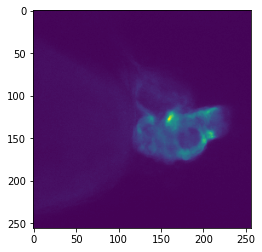

In [16]:
plt.imshow(frames[0][0])

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [33]:
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image


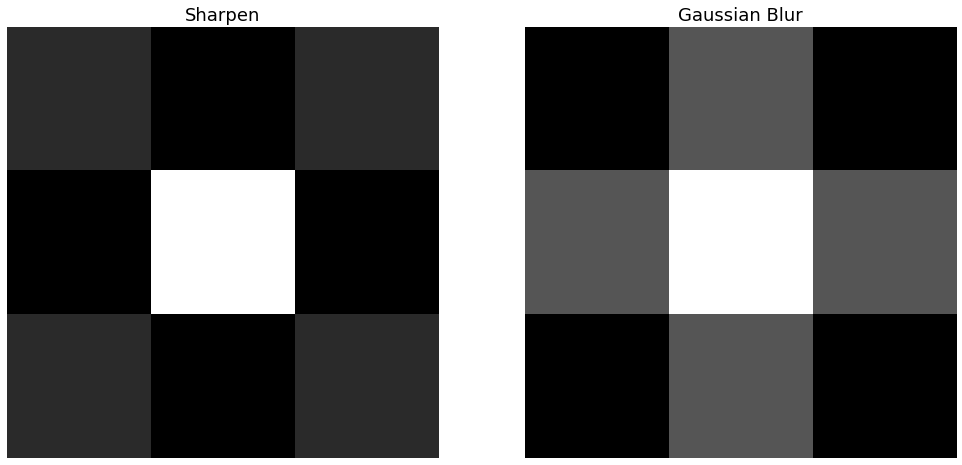

In [43]:
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
#Laplacian
laplacian = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])
# Gaussian Blur
gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])
fig, ax = plt.subplots(1,2, figsize = (17,10))
ax[0].imshow(sharpen, cmap='gray')
ax[0].set_title(f'Sharpen', fontsize = 18)
    
ax[1].imshow(gaussian, cmap='gray')
ax[1].set_title(f'Gaussian Blur', fontsize = 18)
    
[axi.set_axis_off() for axi in ax.ravel()];

In [42]:
img = frames[0][0]

In [47]:
gau2 = multi_convolver(img, gaussian, 2)
lap1 = multi_convolver(img, laplacian, 1)

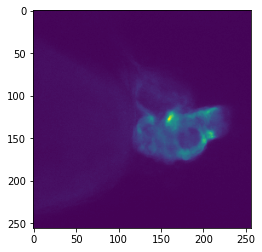

In [49]:
plt.imshow(img)

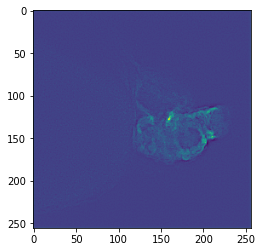

In [105]:
gau2 = multi_convolver(img, gaussian, 2)
gau4 = multi_convolver(img, gaussian, 4)

k = 9
sharp1 = img + k*(img - gau4)
plt.imshow(sharp1)

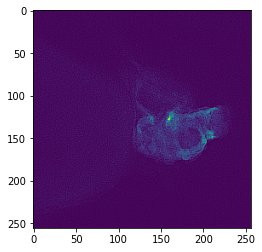

In [55]:
#Importing libraries)
import cv2
import numpy as np


#Let's make a kernel which we will slide over our image(convolution))
kernel = np.array([[-1 , -1 , -1] , [-1 , 9 , -1] ,[-1 , -1 , -1]])

#Now we will perform convolution using open cv for shapening ur image)
sharp_img = cv2.filter2D(img , -1 , kernel = kernel)
plt.imshow(sharp_img)


In [104]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)


def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Morphological ACWE
image = frames[0]

# Initial level set
init_ls = checkerboard_level_set(image.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, 100, init_level_set=init_ls, smoothing=3,
                             iter_callback=callback)

fig, axes = plt.subplots(1, 2, figsize=(16, 16))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[20], [0.5], colors='y')
contour.collections[0].set_label("Iteration 11")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 100")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)

plt.show()

AttributeError: 'list' object has no attribute 'shape'